Visualization project -Fashion-MNIST 

Fashion-MNIST database of fashion articles.
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

In [1]:
# loading libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
# load dataset
#   Training data
df_training = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttrain.csv')

#   split data table into data Features (x) and class labels (y)
xdf_train = df_training.iloc[:, 1:]
ydf_train = df_training.iloc[:, :1]
print('Features: ',xdf_train.shape, ' Labels: ',ydf_train.shape)

Features:  (60000, 784)  Labels:  (60000, 1)


In [3]:
#   Test data
#   split data table into data Features (x) and class labels (y)
df_test = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttest.csv')

#   split data table into data Features (x) and class labels (y)
xdf_test = df_test.iloc[:, 1:]
ydf_test = df_test.iloc[:, :1]
print('Features: ',xdf_test.shape, ' Labels: ',ydf_test.shape)

Features:  (10000, 784)  Labels:  (10000, 1)


In [4]:
#   Convert to numpy array
X_train = xdf_train.as_matrix()
y_train = ydf_train.as_matrix()
X_test = xdf_test.as_matrix()
y_test = ydf_test.as_matrix()

# Reshape array
y2_train = np.ravel( y_train[ : , 0] ) 
y2_test = np.ravel( y_test[ : , 0] ) 

#
print(X_train.shape, y2_train.shape)

(60000, 784) (60000,)


In [5]:
# Define function imshow - Sets up plot for a subset of the data
def imshow(image_set, nrows=4, ncols=10, figsize=(12.5, 5)):
    plot_num = nrows * ncols
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10*nrows/ncols))
    plt.tight_layout(False)
    fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    ax = ax.ravel()
    for i in range(plot_num):
        ax[i].imshow(-image_set[i].reshape(28, 28), cmap="gray")
        ax[i].set_xticks([])
        ax[i].set_yticks([])

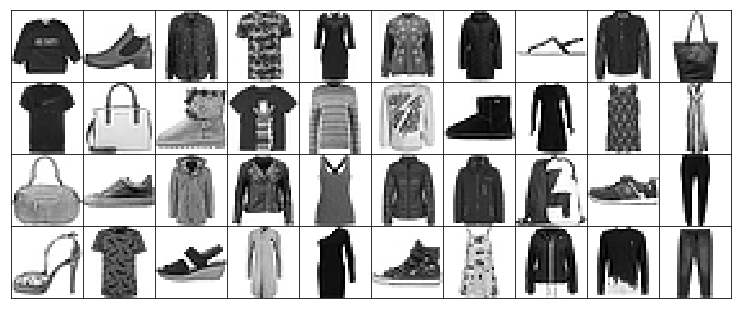

In [6]:
# plot sample of images
imshow(X_train)
plt.show()

Reduce the dimensionality of a data set. To be able to process large datasets used
principal component analysis (PCA) to reduce the dimensionality of a data set.
This is an Unsupervised clustering algorithm.

In [7]:
# Standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

# PCA in scikit-learn  
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)


C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


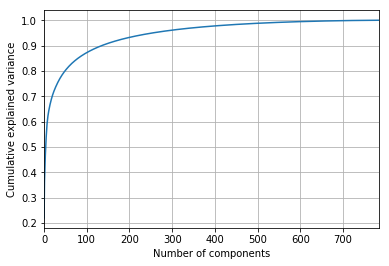

In [8]:
# Plot to find the best Number of components to use
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,784,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

The above plot shows
    ~40  variance for 2   components
    ~80% variance for 50  components
    ~88% variance for 100 components
    ~94% variance for 200 components
    ~96% variance for 300 components

We wil use 50 components  for the PCA to reduce the dimensionality


In [9]:
# PCA - Using 50 components for training data
sklearn50_pca = PCA(n_components=50)
X_50 = sklearn50_pca.fit_transform(X_std)
print(X_50.shape)

(60000, 50)


In [10]:
# Test data - Using 50 components
X_std = StandardScaler().fit_transform(X_test)
pca = PCA().fit(X_std)
sklearn50_pca = PCA(n_components=50)
Xtest_50 = sklearn50_pca.fit_transform(X_std)
print(Xtest_50.shape)


C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(10000, 50)


Using the 2 components (~ 40% variance) will create a scatter plot to see 
how the data is clustered together

C:\Users\rivas\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\rivas\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\rivas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


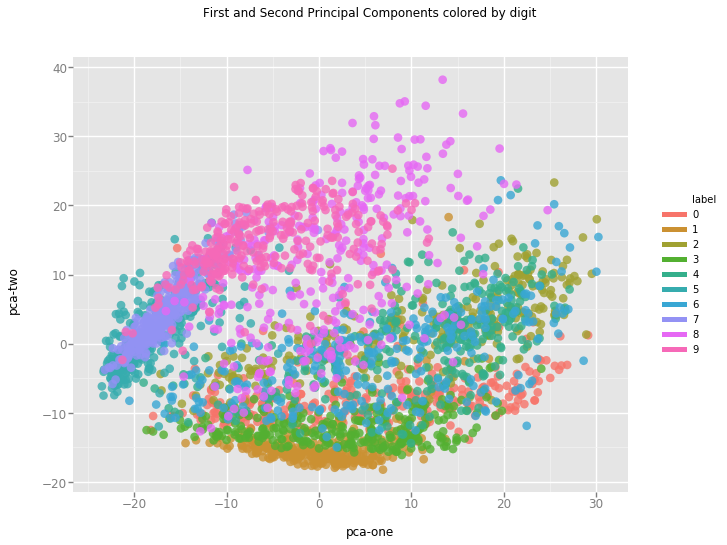

<ggplot: (-9223371883965336092)>

In [11]:
# Plot first two components
from ggplot import *
feat_cols = [ 'pixel'+str(i) for i in range(X_train.shape[1]) ]
df = pd.DataFrame(X_train,columns=feat_cols)
df['label'] = y2_train
df['label'] = df['label'].apply(lambda i: str(i))

rndperm = np.random.permutation(df.shape[0])

df['pca-one'] = X_50[:,0]
df['pca-two'] = X_50[:,1]
chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

The two components represent about 40% Cumulative explained variance
From the graph you can see the clustering, but not enought to set them apart.

We will use the 50 components ~80% variance for our predictive model

Using Random Forest Classifier, after evaluating other models

In [12]:
# Random Forest Classifier
# 1 - Import the model
from sklearn.ensemble import RandomForestClassifier

# 2 - Make an instance of the Model
RF_clf = RandomForestClassifier(n_jobs=2, random_state=0)


# 3 - Training the model: Using PCA 50 (X_50) for training data
#     fitting the model
RF_clf.fit(X_50, y2_train)


# 4 - Predict the response
RF_clf_predict = RF_clf.predict(Xtest_50)

# 5 - Evaluate accuracy
#     loading libraries
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y2_test, RF_clf_predict))

Accuracy: 0.6973


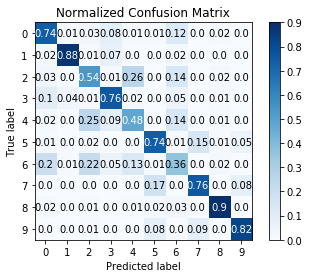

In [13]:
# plot normalized confusion matrix 
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y2_test, RF_clf_predict, normalize=True)
plt.show()